# ИССЛЕДОВАНИЕ ХАРАКТЕРИСТИК РЕЗКОСТИ МИКРОСКОПИЧЕСКИХ ИЗОБРАЖЕНИЙ МЕДИКО-БИОЛОГИЧЕСКИХ ПРЕПАРАТОВ
## Задание выполнено студентом 
## группы: ____________________________________________________
## ФИО: ________________________________________________________________


# 1) Сумма квадратов гауссовых производных

## Теоретические сведения

Алгоритм относится к характеристикам, основанным на вычислении производной. Алгоритм основывается на использовании производных Гауссова фильтра в горизонтальном и вертикальном направлениях:


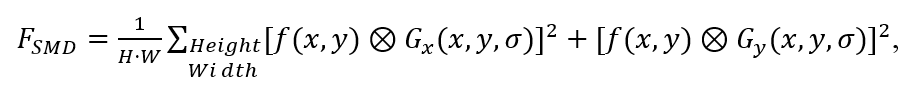

где	H, W – высота и ширина изображения;   
    Gx(x, y, σ) и Gy(x, y, σ) – производные Гауссова фильтра в горизонтальном и     вертикальном направлениях;   
    σ – среднеквадратичное отклонение распределения, равное:

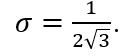

## Ход работы

1) Расположите снятые изображения в папке Images.

Далее выполняем скрипт программы, написанной на Python.

2) Импортируем необходимые библиотечные модули:

In [ ]:
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy import ndimage, linalg, fftpack
from math import sqrt
import numpy as np
import pywt
from skimage import morphology

Подробнее про используемые библиотеки:   
https://matplotlib.org/    
https://docs.scipy.org/doc/scipy/reference/  
https://docs.python.org/3/library/math.html    
http://www.numpy.org/   
https://pywavelets.readthedocs.io/en/latest/   
https://scikit-image.org/

3) Укажем количество изображений для анализа (предполагается, что в ходе лабораторной работы было снято 41 изображение от -20 до 20:

In [ ]:
n = 41

4) Создадим список для хранения изображений и значений величины сфокусированности (список создается заполненым нулями и заранее заданного размера для обеспечения удобства наблюдения за ходом вычисления резкости): 

In [ ]:
img = [0]*n
focus_value = [0]*n

Считаем изображения (дописать директорию!):  

In [ ]:
for k in range(0,n):
    # чтение изображений
    img[k] = imread('Images/_______/{}.png'.format(-20+k), False , 'L')

5) Создадим цикл в котором в диапазоне от 0 до n + 1 (+1 - поскольку range не включает последнее число) выполним ряд операций: 

In [ ]:
for k in range(0,n):
    print("Image '"+str(k-20)+"' processed")
    
    # определение размеров изображения
    H, W = img[k].shape
    
    # расчет значения сигмы
    s = 1.1/(2*sqrt(3))
    
    # обнуление значений переменных
    fx = 0
    fy = 0
    
    # примененение Гауссового фильтра в горизонтальном направлении
    for i in range(0,H):
        fx += (ndimage.filters.gaussian_filter(img[k][i], s, 1 )**2)
        
    # примененение Гауссового фильтра в вертикальном направлении
    for j in range(0,W):
        fy += (ndimage.filters.gaussian_filter(img[k][:,j], s, 1 )**2)
    
    # расчет значения резкости
    f = sum(fx) + sum(fy)
    focus_value[k] = (1/(H*W)) * f        
print(focus_value, '\n')

6) Построим фокусирочную кривую и определим сфокусировонное изображение как максимум данной кривой:

In [ ]:
y_axis = focus_value
x_axis = np.linspace(-20, 20, len(y_axis), endpoint=True)
plt.plot(x_axis,y_axis)
plt.xlabel('Номер изображения (z-ось)')
plt.ylabel('Значение резкости (ед.)')
plt.grid()
plt.show()

focused_num_SKGP = int(x_axis[y_axis.index(max(y_axis))])
print("Сфокусированное изображение:", focused_num_SKGP)

7) Посмотрим на данное изображение:

In [ ]:
plt.imshow(img[y_axis.index(max(y_axis))], 'gray')
plt.title('Сфокусированное изображние №'+str(focused_num_SKGP))
plt.axis('off')
plt.show()

## Анализ полученных данных

Проанализировать (описать) полученную фокусировочную кривую в соответсвии с критериями:   
- точности;
- локальных максимумов;
- области значений;
- ширины;
- уровня шума.

### // Ответ можно написать ниже
/    
/   
/   
/   
/   

# 2) Градиент Тененбаума

## Теоретические сведения

В данном методе расчета изображение подвергается свертке с операторами Собеля Sx(x, y) и Sy(x, y), а затем проводится суммирование квадратов вектора градиента:

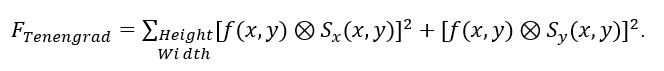

## Ход работы

Полагаем, что импортирование библиотек и считывание изображений было выполнено ранее. Предварительно очистим список, содержащий значения резкости:

In [ ]:
focus_value = [0]*n

1) В цикле последовательно выполним операции, аналогично предыдущему случаю:

In [ ]:
for k in range(0,n):  
    print("Image '"+str(k-20)+"' processed")
    
    # Применение оператора Собеля в горизонтальном направлении 
    dx = ndimage.sobel(img[k], 0)
    # Применение оператора Собеля в вертикальном направлении 
    dy = ndimage.sobel(img[k], 1)
    
    # Расчет характеристики резкости в соответствии с формулой 
    focus_value[k] = ndimage.sum(((dx**2) + (dy**2)))
print(focus_value, '\n')

2) Построим фокусирочную кривую и определим сфокусировонное изображение как максимум данной кривой:

In [ ]:
y_axis = focus_value
x_axis = np.linspace(-20, 20, len(y_axis), endpoint=True)
plt.plot(x_axis,y_axis)
plt.xlabel('Номер изображения (z-ось)')
plt.ylabel('Значение резкости (ед.)')
plt.grid()
plt.show()

focused_num_Tenenbaum = int(x_axis[y_axis.index(max(y_axis))])
print("Сфокусированное изображение:", focused_num_Tenenbaum)

3) Посмотрим на данное изображение:

In [ ]:
plt.imshow(img[y_axis.index(max(y_axis))], 'gray')
plt.title('Сфокусированное изображние №'+str(focused_num_Tenenbaum))
plt.axis('off')
plt.show()

## Анализ полученных данных

Проанализировать (описать) полученную фокусировочную кривую в соответсвии с критериями:   
- точности;
- локальных максимумов;
- области значений;
- ширины;
- уровня шума.

### // Ответ можно написать ниже
/    
/   
/   
/   
/   

# 3) Сумма модифицированных лапласианов 

## Теоретические сведения

В данном алгоритме суммируются абсолютные значения свертки изображе-ния с операторами Лапласа Lx(x, y) и Ly(x, y):

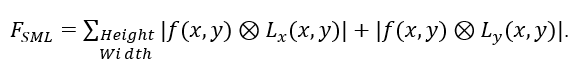

## Ход работы

Предварительно очистим список для значений резкости

In [ ]:
focus_value = [0]*n

1) В цикле для каждого изображения выполним операции:

In [ ]:
for k in range(0,n):
    print("Image '"+str(k-20)+"' processed")
        
    # Вычисление Лапласиана для изображения
    Lapl = ndimage.laplace(img[k])
    # Применение оператора Лапласа к изображения в горизонтальном направлении
    Laplx = np.gradient(Lapl, axis = 0)
    # Применение оператора Лапласа к изображения в вертикальном направлении
    Laply = np.gradient(Lapl, axis =1)
   
    # Расчет резкости изображения в соотвествии с формулой
    focus_value[k] = ndimage.sum(abs(Laplx) + abs(Laply))
print(focus_value, '\n')

2) Построим фокусирочную кривую и определим сфокусировонное изображение как максимум данной кривой:

In [ ]:
y_axis = focus_value
x_axis = np.linspace(-20, 20, len(y_axis), endpoint=True)
plt.plot(x_axis,y_axis)
plt.xlabel('Номер изображения (z-ось)')
plt.ylabel('Значение резкости (ед.)')
plt.grid()
plt.show()

focused_num_Laplace = int(x_axis[y_axis.index(max(y_axis))])
print("Сфокусированное изображение:", focused_num_Laplace)

3) Посмотрим на данное изображение:

In [ ]:
plt.imshow(img[y_axis.index(max(y_axis))], 'gray')
plt.title('Сфокусированное изображние №'+str(focused_num_Laplace))
plt.axis('off')
plt.show()

## Анализ полученных данных

Проанализировать (описать) полученную фокусировочную кривую в соответсвии с критериями:   
- точности;
- локальных максимумов;
- области значений;
- ширины;
- уровня шума.

### // Ответ можно написать ниже
/    
/   
/   
/   
/   

# 4) Дисперсия

## Теоретические сведения

Алгоритм вычисляет отклонение уровня интенсивности пикселей серошкаль-ного изображения от среднего значения интенсивности μ:

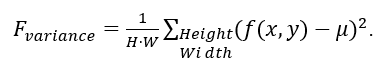

## Ход работы

Очистим список для значений резкости:

In [ ]:
focus_value = [0]*n

1) В цикле для каждого изображения выполним операции:

In [ ]:
for k in range(0,n):
    print("Image '"+str(k-20)+"' processed")
    
    # Определим среднее значение
    int_mean = ndimage.mean(img[k])
    
    # Рассчитаем значение резкости по формуле
    focus_value[k] = ((linalg.norm(img[k]-int_mean))**2)/(H*W)
print(focus_value, '\n\n')

2) Построим фокусирочную кривую и определим сфокусировонное изображение как максимум данной кривой:

In [ ]:
y_axis = focus_value
x_axis = np.linspace(-20, 20, len(y_axis), endpoint=True)
plt.plot(x_axis,y_axis)
plt.xlabel('Номер изображения (z-ось)')
plt.ylabel('Значение резкости (ед.)')
plt.grid()
plt.show()

focused_num_Variance = int(x_axis[y_axis.index(max(y_axis))])
print("Сфокусированное изображение:", focused_num_Variance)

3) Посмотрим на данное изображение:

In [ ]:
plt.imshow(img[y_axis.index(max(y_axis))], 'gray')
plt.title('Сфокусированное изображние №'+str(focused_num_Variance))
plt.axis('off')
plt.show()

## Анализ полученных данных

Проанализировать (описать) полученную фокусировочную кривую в соответсвии с критериями:   
- точности;
- локальных максимумов;
- области значений;
- ширины;
- уровня шума.

### // Ответ можно написать ниже
/    
/   
/   
/   
/   

# 5) Автокорреляция

## Теоретические сведения

Алгоритм вычисляет корреляционную функцию для данного изображения:

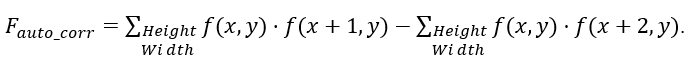

## Ход работы

Очистим список для значений резкости:

In [ ]:
focus_value = [0]*n

1) Напишем функцию для расчета автокорреляции:

In [ ]:
def autocorr(x, t):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))

2) Создадим списки для хранения значений расчета автокорреляции

In [ ]:
temp = [0]*n
correl1 = []
correl2 = []

In [ ]:
for k in range(0,n):
    print("Image '"+str(k-20)+"' processed")
    
    # Расчет автокорреляции с помощью написанной функции
    for row in img[k]:
        correl1.append((autocorr(row,1)))
        correl2.append((autocorr(row,2)))
        
    # Расчет разности автокорреляци1   
    temp[k] = ((sum(correl1))-(sum(correl2)))
    focus_value[k] = temp[k][0][1]
    
    # очистим списки для хранения значений автокорреляции
    del correl1[:]
    del correl2[:]
    
print(focus_value, '\n')

2) Построим фокусирочную кривую и определим сфокусировонное изображение как максимум данной кривой:

In [ ]:
y_axis = focus_value
x_axis = np.linspace(-20, 20, len(y_axis), endpoint=True)
plt.plot(x_axis,y_axis)
plt.xlabel('Номер изображения (z-ось)')
plt.ylabel('Значение резкости (ед.)')
plt.grid()
plt.show()

focused_num_Autocorrelation = int(x_axis[y_axis.index(max(y_axis))])
print("Сфокусированное изображение:", focused_num_Autocorrelation)

3) Посмотрим на данное изображение:

In [ ]:
plt.imshow(img[y_axis.index(max(y_axis))], 'gray')
plt.title('Сфокусированное изображние №'+str(focused_num_Autocorrelation))
plt.axis('off')
plt.show()

## Анализ полученных данных

Проанализировать (описать) полученную фокусировочную кривую в соответсвии с критериями:   
- точности;
- локальных максимумов;
- области значений;
- ширины;
- уровня шума.

### // Ответ можно написать ниже
/    
/   
/   
/   
/   

# 6) Байесовская энтропия спектра

## Теоретические сведения

Характеристика использует дискретное косинусное преобразование:

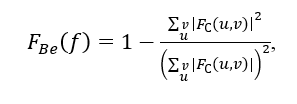

где	FC – дискретное косинусное преобразование изображения;   
(u, v) – координаты в пространственно-частотной области.


## Ход работы

Очистим список для значений резкости:

In [ ]:
focus_value = [0]*n

1) В цикле для каждого изображения выполним операции:

In [ ]:
for k in range(0,n):
    print("Image '"+str(k-20)+"' processed")
    
    # Вычисление дискретного косинусного преобразования
    f_dct = (fftpack.dct(img[k]))
    # Вычисление норм
    f_norm1 = (linalg.norm(f_dct))**2
    f_norm2 = (linalg.norm(f_dct, 'nuc'))**2

    # Вычисление значения резкости по формуле
    focus_value[k] = (1 - (f_norm1/f_norm2))
print(focus_value, '\n')

2) Построим фокусирочную кривую и определим сфокусировонное изображение как максимум данной кривой:

In [ ]:
y_axis = focus_value
x_axis = np.linspace(-20, 20, len(y_axis), endpoint=True)
plt.plot(x_axis,y_axis)
plt.xlabel('Номер изображения (z-ось)')
plt.ylabel('Значение резкости (ед.)')
plt.grid()
plt.show()

focused_num_Bayess = int(x_axis[y_axis.index(max(y_axis))])
print("Сфокусированное изображение:", focused_num_Bayess)

3) Посмотрим на данное изображение:

In [ ]:
plt.imshow(img[y_axis.index(max(y_axis))], 'gray')
plt.title('Сфокусированное изображние №'+str(focused_num_Bayess))
plt.axis('off')
plt.show()

### // Ответ можно написать ниже
/    
/   
/   
/   
/   

# 7) Дискретное вейвлет преобразование

## Теоретические сведения

Вычисление ДВП позволяет отделить сигналы высокочастотного диапазона от исходного изображения, после чего эти составляющие используются для оценки значения резкости. Изображение разделяется на четыре полосы {LL, LH, HL, HH}, где L и H обозначают низкочастотную и высокочастотную полосы соответственно. Для оценки резкости изображения используется по-лоса HH. Таким образом, для изображения X и его ДВП X* размером (n, m) функция резкости вычисляется как:

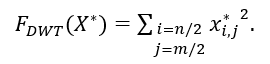

## Ход работы

Очистим список для значений резкости:

In [ ]:
focus_value = [0]*n

1) В цикле для каждого изображения выполним операции:

In [ ]:
for k in range(0,n):
    print("Image '"+str(k-20)+"' processed")
    
    # Вычисление коэффициентов преобразования
    coeffs = pywt.dwt2(img[k], 'haar')
    LL, (LH, HL, HH) = coeffs
    
    # Вычисление значения резкости по формуле
    focus_value[k] = ndimage.sum(abs(HH))
    
print(focus_value, '\n')

2) Построим фокусирочную кривую и определим сфокусировонное изображение как максимум данной кривой:

In [ ]:
y_axis = focus_value
x_axis = np.linspace(-20, 20, len(y_axis), endpoint=True)
plt.plot(x_axis,y_axis)
plt.xlabel('Номер изображения (z-ось)')
plt.ylabel('Значение резкости (ед.)')
plt.grid()
plt.show()

focused_num_DWT = int(x_axis[y_axis.index(max(y_axis))])
print("Сфокусированное изображение:", focused_num_DWT)

3) Посмотрим на данное изображение:

In [ ]:
plt.imshow(img[y_axis.index(max(y_axis))], 'gray')
plt.title('Сфокусированное изображние №'+str(focused_num_DWT))
plt.axis('off')
plt.show()

## Анализ полученных данных

Проанализировать (описать) полученную фокусировочную кривую в соответсвии с критериями:   
- точности;
- локальных максимумов;
- области значений;
- ширины;
- уровня шума.

### // Ответ можно написать ниже
/    
/   
/   
/   
/   

# 8) Алгоритм выделения границ 


## Теоретические сведения


Данный алгоритм основывается на методах морфологической обработки изображения и используется для оценки резкости из-за вычислительной эффективности. На первом этапе проводится операция дилатации (расширения) границы объекта на изображении. После получения нового изображения X*, проводится суммирование для оценки резкости:

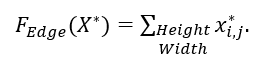

## Ход работы

Очистим список для значений резкости и зададим списки для хранения изображений после дилатации и последующей обработки:

In [ ]:
focus_value = [0]*n
img_dilat = [0]*n
img_result = [0]*n

1) В цикле для каждого изображения выполним операции:

In [ ]:
for k in range(0,n):
    print("Image '"+str(k-20)+"' processed")
    
    # Выполнение дилатации над исходным изображением
    img_dilat[k] = morphology.dilation(img[k])
    # Вычитание из нового изображения старого
    img_result[k] = img_dilat[k] - img[k]
    
    # Вычисление значения резкости по формуле
    focus_value[k] = ndimage.sum(img_result[k])
    
print(focus_value, '\n')

2) Построим фокусирочную кривую и определим сфокусировонное изображение как максимум данной кривой:

In [ ]:
y_axis = focus_value
x_axis = np.linspace(-20, 20, len(y_axis), endpoint=True)
plt.plot(x_axis,y_axis)
plt.xlabel('Номер изображения (z-ось)')
plt.ylabel('Значение резкости (ед.)')
plt.grid()
plt.show()

focused_num_Edge = int(x_axis[y_axis.index(max(y_axis))])
print("Сфокусированное изображение:", focused_num_Edge)

3) Посмотрим на данное изображение:

In [ ]:
plt.imshow(img[y_axis.index(max(y_axis))], 'gray')
plt.title('Сфокусированное изображние №'+str(focused_num_Edge))
plt.axis('off')
plt.show()

## Анализ полученных данных

Проанализировать (описать) полученную фокусировочную кривую в соответсвии с критериями:   
- точности;
- локальных максимумов;
- области значений;
- ширины;
- уровня шума.

### // Ответ можно написать ниже
/    
/   
/   
/   
/   

# Подведение итогов

Сравним отклонения изображений, определенных алгоритмами как наиболее сфокусированных:

In [ ]:
dictionary_of_results = {'Autocorrelation':focused_num_Autocorrelation, 'Bayess':focused_num_Bayess, 
                         'DWT':focused_num_DWT, 'Edge':focused_num_Edge, 'Laplace':focused_num_Laplace,
                         'Gauss':focused_num_SKGP, 'Tenenbaum':focused_num_Tenenbaum, 'Variance':focused_num_Variance} 
print(dictionary_of_results)

# Построим график
plt.bar(range(len(dictionary_of_results)), list(dictionary_of_results.values()), align='center')
plt.grid()
plt.xticks(range(len(dictionary_of_results)), list(dictionary_of_results.keys()), rotation='vertical')
plt.show()

### Написать вывод о пригодности каждого алгоритма для задач пассивной автофокусировки
/    
/   
/   
/   
/   

# Список рекомендуемой литературы

1. Wu Q., Merchant F. A., Castleman K. R. 1.	Microscope Image Processing // Oxford: Academic Press, 2008. 548 pp..
2. Артюхова О.А., Самородов А.В. Сравнительное исследование характеристик резкости микроскопических изображений медико-биологических препаратов // Медицинская техника.  2011. №1. С. 15-22.
3. Liu X.Y., Wang W.H., Sun Y. Dynamic evaluation of autofocusing for automated microscopic analysis of blood smear and pap smear // Journal of Microscopy – 2007. Vol. 227. P. 15-23.
4. Sun Y., Duthaler S., Nelson B.J. Autofocusing in computer microscopy: Selecting the optimal focus algorithm // Microscopy Research and Technique. 2004.  Vol. 65. P. 139-149.
5. Chen C.Y., Hwang R.C, Chen Y.J. A passive auto-focus camera control system // Applied Soft Computing. 2010. Vol. 10. P. 296-303. 
6. 1.	Santos A., Solorzano C.O., Vaquero J.J., Pena J.M., Malpica N., Pozo, F. Evaluation of autofocus functions in molecular cytogenetic analysis // J. Microsc. 188, P. 264–272. 
7. Firestone L, Cook K, Culp K, Talsania N, Preston K. Comparison of autofocus methods for automated microscopy // Cytometry 12: P. 195–206.
